In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import statsmodels.api       as sm

import folium  #needed for interactive map
from folium.plugins import HeatMap

from collections              import Counter
from sklearn                  import preprocessing
from datetime                 import datetime
from collections              import Counter
from math                     import exp

from sklearn                  import linear_model
from sklearn.linear_model     import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.ensemble         import RandomForestClassifier

from sklearn import metrics
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score
from sklearn.preprocessing import OneHotEncoder
from   scipy import stats

from patsy.builtins import *
!pip install pingouin
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests

%matplotlib inline
sns.set()

df=pd.read_csv('SF_2009.csv')
df.shape

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1044696, 43)

In [ ]:
#df.columns

In [ ]:
#Drops 'bad' columns or columns we do not think we will need

df=df.drop(['Block', 'Lot', 'Use Code', 'Volume Number', 'Use Definition',
         'Property Class Code', 'Property Class Code Definition', 'Lot Depth', 'Lot Frontage',
        'Lot Code', 'Exemption Code', 'Exemption Code Definition', 'Status Code', 'Misc Exemption Value', 'Homeowner Exemption Value',
        'Lot Frontage', 'Tax Rate Area Code',
        'Percent of Ownership', 'Row ID',
        'Zoning Code'], axis=1)

**Analysis Neighborhood**

In [ ]:
#Sets index to 'Parcel Number' because each address has a unique parcel number that we can use to clean data

df.set_index("Parcel Number", inplace=True)

In [ ]:
#corrects an NaN value in Analysis Neighborhood

df.loc["2619047","Analysis Neighborhood"]="Castro/Upper Market"

In [ ]:
#Drops all rows with NaN values in 'Analysis Neighborhood'

df.dropna(subset=["Analysis Neighborhood"], inplace=True, axis=0) #axis=0 is rows

In [ ]:
#Retreives the Number of Data Points for each Analysis Neighborhood

df[df['Closed Roll Year'] == 2019].groupby(['Analysis Neighborhood', 'Closed Roll Year']).size()

Analysis Neighborhood           Closed Roll Year
Bayview Hunters Point           2019                 5747
Bernal Heights                  2019                 4752
Castro/Upper Market             2019                 1629
Chinatown                       2019                   21
Excelsior                       2019                 7822
Financial District/South Beach  2019                    5
Glen Park                       2019                 1957
Haight Ashbury                  2019                  782
Hayes Valley                    2019                  205
Inner Richmond                  2019                 1376
Inner Sunset                    2019                 4236
Japantown                       2019                   21
Lakeshore                       2019                   65
Lincoln Park                    2019                   14
Lone Mountain/USF               2019                  678
Marina                          2019                 1166
McLaren Park           

In [ ]:
#Drops Analysis Neighborhoods with less than 10 data points for each year.

df.drop(df.loc[df['Analysis Neighborhood']=='Chinatown'].index, inplace=True)
df.drop(df.loc[df['Analysis Neighborhood']=='Lakeshore'].index, inplace=True)
df.drop(df.loc[df['Analysis Neighborhood']=='Presidio'].index, inplace=True)
df.drop(df.loc[df['Analysis Neighborhood']=='Tenderloin'].index, inplace=True)
df.drop(df.loc[df['Analysis Neighborhood']=='Japantown'].index, inplace=True)
df.drop(df.loc[df['Analysis Neighborhood']=='Lincoln Park'].index, inplace=True)
df.drop(df.loc[df['Analysis Neighborhood']=='South of Market'].index, inplace=True)
df.drop(df.loc[df['Analysis Neighborhood']=='Financial District/South Beach'].index, inplace=True)

**Number of Units**

In [ ]:
#removes all properties with more than 1 unit (keeps only single-unit addresses)
df=df[df["Number of Units"]== 1]

In [ ]:
df["Number of Units"].unique()

array([1])

**Number of Stories**

In [ ]:
#Sets values with 'bad' data to np.nan
#963, 225, 994, 10, 7, 93
df['Number of Stories'] = df['Number of Stories'].replace({0:np.nan, 963:np.nan,
                                  225:np.nan, 994:np.nan, 10:np.nan, 7:np.nan, 93:np.nan, 6:np.nan})

In [ ]:
#Drops values with np.nan
df.dropna(subset=["Number of Stories"], inplace=True, axis=0)

In [ ]:
#df[df['Number of Stories']==8]


In [ ]:
#corrects the number of stories on certain data points

df.loc['5699011', 'Number of Stories'] = 1
df.loc['7000010', 'Number of Stories'] = 1
df.loc['5807018', 'Number of Stories'] = 1
df.loc['2383024', 'Number of Stories'] = 1
df.loc['2755005', 'Number of Stories'] = 2
df.loc['1621030', 'Number of Stories'] = 2
df.loc['1307001X', 'Number of Stories'] = 2

**Total Assesed Value**

In [ ]:
#creating total assessed value column
df['Total Assessed Value']=df['Assessed Fixtures Value']+df['Assessed Improvement Value']+df['Assessed Land Value']+df['Assessed Personal Property Value']

In [ ]:
#Sets all properties with $0 as the value to np.nan
df['Total Assessed Value'] = df['Total Assessed Value'].replace({0:np.nan})

In [ ]:
df["Total Assessed Value"].isna().sum()

665

In [ ]:
#Drops the properties with $0 as assessed values
df.dropna(subset=["Total Assessed Value"], inplace=True, axis=0)

In [ ]:
df.shape

(1023142, 24)

**Property Location**

In [ ]:
#Take excess spaces out of df['Property Location]
x = 0
while x<10:
  df['Property Location'] = df['Property Location'].str.replace('  ', ' ')
  x = x + 1

In [ ]:
df.reset_index(inplace=True)

In [ ]:
# Drop rows with df['Property Location'] that do not begin with 0000
# Drops addresses such as 1523 0023 52ND AV0000 because these kind of addresses do not populate when trying to search for them

df.drop((i
         for i in range (0, len(df))
         if ('0000')
         not in df['Property Location'].loc[i][:4]),
          inplace = True)

df.reset_index(inplace = True, drop = True)

In [ ]:
#Takes out 0000 from the beginning of df['Property Location']
#Makes 0000 1686 35TH AV0000 into 1686 35TH AV0000

df['Property Location'] = df['Property Location'].str.replace('0000 ', '')

In [ ]:
#Drops the Last 4 numbers from df['Property Location']
#Makes 1686 35TH AV0000 into 1686 35TH AV

df['Property Location'] = [df['Property Location'].loc[i].replace(df['Property Location'].loc[i][-4:], '')
                          for i in range(0, len(df['Property Location']))]

In [ ]:
(df['Property Location']=='').sum()

80

In [ ]:
#Changes all blank values for 'Property Location' into NaN values
df['Property Location'] = df['Property Location'].replace({'':np.nan})

#Drops all rows with 'Property Location as NaN value
df.dropna(subset = ['Property Location'], inplace = True)

**Number of Bedrooms**

In [ ]:
#Reference Code to Look at the houses with different numbers of bedrooms
#df[df['Number of Bedrooms']==999]

In [ ]:
df.set_index('Parcel Number', inplace = True, drop = True)

In [ ]:
#Correct values with 12, 13, 22, 44, 80 and 2065 Bedrooms

df.loc['1364026', 'Number of Bedrooms'] = 3                 #2065 Bedrooms / 0154 05TH AV
df.loc['0639007', 'Number of Bedrooms'] = np.NaN            #80 Bedrooms- come back to this one, none of the values make sense / 2022 CALIFORNIA ST
df.loc['1590007B', 'Number of Bedrooms'] = 2                #44 Bedrooms / 0645 47TH AV
df.loc['2701A020', 'Number of Bedrooms'] = 3                #22 Bedrooms / 4615 19TH ST
df.loc['1207013A', 'Number of Bedrooms'] = 10               #13 Bedrooms  / 1550 FELL ST
df.loc['0641003', 'Number of Bedrooms'] = 11                #12 Bedrooms  / 1701 FRANKLIN ST


In [ ]:
#Drops values with 13, 20 and 21 Bedrooms

#df.drop(df.loc['5925026'].index, inplace=True)      #Drops 21 Bedrooms / 0129 GIRARD ST
#df.drop(df.loc['0778006'].index, inplace=True)      #Drops 20 Bedrooms (This place is a bed and breakfast, not single family home) / 1000 FULTON ST
#df.drop(df.loc['7002041'].index, inplace=True)      #Drops 13 Bedrooms / 0278 MONTICELLO ST
#df.drop(df.loc['1406029'].index, inplace=True)      #Drops 12 Bedrooms / 0366 28TH AV
df.drop(df.loc['6995037'].index, inplace=True)      #Drop 11 Bedrooms (This address seems to now be a childcare center) / 0454 RALSTON ST

In [ ]:
df.reset_index(inplace = True)

In [ ]:
#Converts all values in df['Number of Bedrooms'] into NaN if there are 10 or more bedrooms

df['Number of Bedrooms'] = df['Number of Bedrooms'].replace({0:np.nan, 999:np.nan}) #, 10:np.nan, 11:np.nan, 12:np.nan, 13:np.nan, 20:np.nan, 21:np.nan})


In [ ]:
df.dropna(subset=["Number of Bedrooms"], inplace=True, axis=0)

In [ ]:
df['Number of Bedrooms'].isnull().sum()

0

In [ ]:
df.reset_index(inplace = True, drop = True)

**Property Area Column**

In [ ]:
#df['Property Area'].max()

In [ ]:
#df.loc[df['Property Area']==22650]

In [ ]:
#df.loc['3621070']

In [ ]:
df.set_index('Parcel Number', inplace = True)

In [ ]:
#Corrects faulty 'Property Area' Values

#df.loc['5996012', 'Property Area'] = 1470       #0421 HARVARD ST
#df.loc['6094009A', 'Property Area'] = 1125      #1015 RUSSIA AV
df.loc['2475042', 'Property Area'] = 1770       #2638 22ND AV
#df.loc['1063032', 'Property Area'] = 2376       #0168 JORDAN AV
df.loc['2784008', 'Property Area'] = 1270       #0165 MARVIEW WY

#df.drop('6114007D', inplace = True)            #0651 DARTMOUTH ST #no Property Area found online

In [ ]:
#Drops rows with 'Property Area' less than 500 SQ FT

df.reset_index(inplace = True)

df.drop((i
         for i in range (0, len(df))
         if df['Property Area'].loc[i] < 500),
         inplace = True)

In [ ]:
#Drops rows with 'Property Area' Greater than 6000 SQ FT

df.reset_index(inplace = True, drop = True)

df.drop((i
         for i in range (0, len(df))
         if df['Property Area'].loc[i] > 6000),
         inplace = True)

In [ ]:
df['Property Area'].describe().astype(int)

count    323679
mean       1875
std         761
min         500
25%        1350
50%        1737
75%        2205
max        6000
Name: Property Area, dtype: int64

**Number of Bathrooms**

In [ ]:
len(df[df["Number of Bathrooms"]>=5])

6171

In [ ]:
#Sets bathrooms with 0 values as np.nan

df['Number of Bathrooms'] = df['Number of Bathrooms'].replace({0:np.nan})

In [ ]:
#Drops np.nan

df.dropna(subset=["Number of Bathrooms"], inplace=True, axis=0)

In [ ]:
#Drops properties with 6 or more bathrooms

df.reset_index(inplace = True, drop = True)
df.drop((i
         for i in range (0, len(df))
         if df['Number of Bathrooms'].loc[i] >= 6),
         inplace = True)

**Number of Rooms**

In [ ]:
#Drops rows with nan values

df.dropna(subset=['Number of Rooms'], inplace = True, axis=0)

In [ ]:
df['Number of Rooms'].isnull().sum()

0

In [ ]:
df['Number of Rooms'] = df['Number of Rooms'].astype(int)

In [ ]:
len(df[df["Number of Rooms"]>=10])

29950

In [ ]:
#Drops properties with 10 or more rooms

df.reset_index(inplace = True, drop = True)
df.drop((i
         for i in range (0, len(df))
         if df['Number of Rooms'].loc[i] >= 10),
         inplace = True)

In [ ]:
# Replaces 0 rooms with nan values

df['Number of Rooms'] = df['Number of Rooms'].replace({0:np.nan})

In [ ]:
#Drops rooms with nan values

df.dropna(subset=["Number of Rooms"], inplace=True, axis=0)

**Year Property Built**

In [ ]:
df['Year Property Built'].isnull().sum()

454

In [ ]:
#Drops all properties with NaN values for year built

df.dropna(subset=["Year Property Built"], inplace=True, axis=0)

In [ ]:
df['Year Property Built'] = df['Year Property Built'].astype(int)

In [ ]:
df['Year Property Built'].unique()

array([1925, 1927, 1914, 1951, 1922, 1931, 1900, 1924, 1935, 1921, 1929,
       1987, 1906, 1920, 1956, 1902, 1907, 1905, 1908, 1923, 1955, 1904,
       1903, 1934, 1915, 2002, 1991, 1926, 2001, 1954, 1986, 1936, 1913,
       1928, 1910, 1992, 1981, 1909, 1917, 1891, 1930, 1932, 1937, 1988,
       1940, 1970, 1969, 1950, 1916, 1875, 1941, 1933, 1885, 1873, 1995,
       1853, 1901, 1912, 1997, 1911, 1877, 1989, 1938, 1883, 1960, 1967,
       1890, 1957, 1952, 1898, 1884, 1971, 1899, 1939, 1949, 1889, 1947,
       2003, 1984, 1953, 1962, 1919, 1880, 1974, 1895, 1886, 1994, 1946,
       2006, 1948, 1980, 1942, 1977, 1993, 1958, 1893, 1892, 1959, 1972,
       1968, 1865, 1878, 1894, 1979, 1964, 1918, 1896, 1996, 1998, 1982,
       1990, 1944, 2000, 1888, 1943, 2007, 1963, 1945, 1978, 1999, 1976,
       1966, 1983, 2005, 1985, 1791, 1975, 1965, 1973, 1961, 2004, 1887,
       2009, 2008, 1870, 1897, 2010, 2012, 2013, 2011, 2014, 1881, 2015,
       2016, 2017, 2018, 2019])

In [ ]:
#Creates new column called 'Property Age'

df['Property Age']=df['Closed Roll Year']-df['Year Property Built']

In [ ]:
df.reset_index(inplace = True, drop = True)

**the_geom ---> geom (converting the_geom to lat/long format)**

In [ ]:
#strips extra spaces from 'the_geom'
df['the_geom'] = df['the_geom'].str.strip()

#deletes 'POINT '
df['the_geom'] = df['the_geom'].str.replace('POINT ', '')

#deletes the '(' and ')'
df['the_geom'] = df['the_geom'].str[1:]
df['the_geom'] = df['the_geom'].str[:-1]

In [ ]:
#splits the_geom into longitude and latitude
temp = df["the_geom"].str.split(" ", n = 1, expand = True)

In [ ]:
#creates 'geom' column into lat,long format
temp['geom'] = temp[1] + ',' + temp[0]

In [ ]:
#adds 'geom' into original dataframe
df['geom'] = temp['geom']

In [ ]:
#drops the temp df and the_geom
df.drop('the_geom', axis=1, inplace = True)
del temp

In [ ]:
#Drops duplicates for 'geom' for the same years

df.drop_duplicates(subset = ['Property Location', 'Closed Roll Year'], inplace = True)
df.drop_duplicates(subset = ['geom', 'Closed Roll Year'], inplace = True)

In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
df['geom'].nunique()

34621

In [ ]:
df['Property Location'].nunique()

34818

**Basement Area (1 if House has a basement, 0 if not)**

In [ ]:
df.dropna(subset=["Basement Area"], inplace=True, axis=0)

In [ ]:
 df['Basement Area'].values[df['Basement Area'].values > 0] = 1

**Drop Additional Columns for Dashboard**

In [ ]:
#Drops 'bad' columns or columns we do not think we will need

#df=df.drop(['Number of Bedrooms', 'Number of Units', 'Assessed Fixtures Value', 'Assessed Improvement Value',
#            'Assessed Improvement Value', 'Assessed Land Value', 'Assessed Personal Property Value',
#            'Basement Area', 'Assessor Neighborhood District', 'Assessor Neighborhood', 'Supervisor District'], axis=1)

In [ ]:
#df=df.drop(['Year Property Built', 'Current Sales Date', 'Parcel Number'], axis=1)

In [ ]:
#df.to_csv('SF_2009_Clean_Final.csv')

**EDA Plots**

In [ ]:
df.reset_index(inplace = True, drop = True)

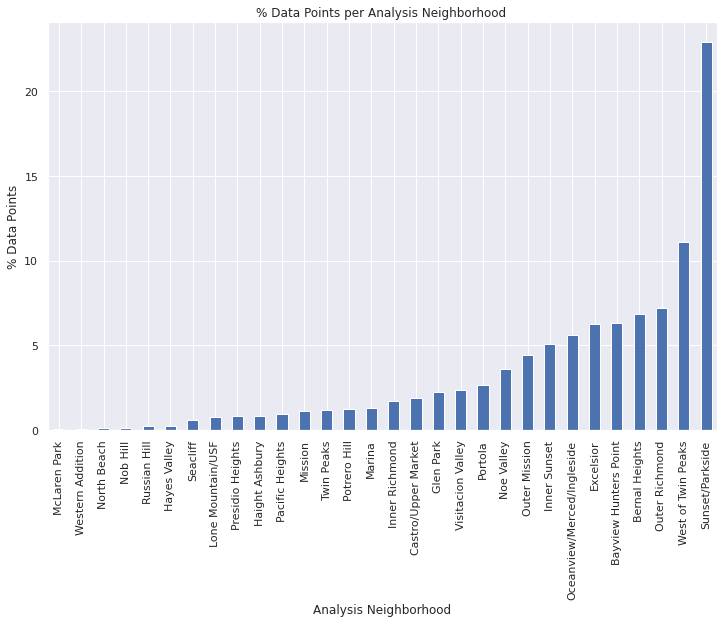

In [ ]:
# How many datapoints in each analysis neighborhood
datapoints_counts = Counter(df["Analysis Neighborhood"])
tdf = pd.DataFrame.from_dict(datapoints_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-38:, :] / len(df)) * 100

# Sort datapoints dataframe by number
tdf.sort_index(axis = 1, ascending = True, inplace = True)

# Plot percent of datapoints by analysis neighborhood
ax = tdf.plot(kind = 'bar', figsize = (12, 7.5))
ax.set_xlabel("Analysis Neighborhood")
ax.set_ylabel("% Data Points")
ax.set_title('% Data Points per Analysis Neighborhood ')
ax.legend_.remove()

plt.show()

#print("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1]))
#The syntax 0:.2f denotes that we will print upto to decimal places
#Change it to %{0:.3f to see what happens}

In [ ]:
#Shows the percentage of Data Points that each Analysis Neighborhood takes up in the dataset.
tdf

,0
McLaren Park,0.072875
Western Addition,0.074594
North Beach,0.114125
Nob Hill,0.127188
Russian Hill,0.224470
Hayes Valley,0.243376
Seacliff,0.576815
Lone Mountain/USF,0.768972
Presidio Heights,0.834628
Haight Ashbury,0.840816


In [ ]:
df['Value_Millions'] = df['Total Assessed Value']/1000000

In [ ]:
temp_df = df[df['Value_Millions'] < 2]

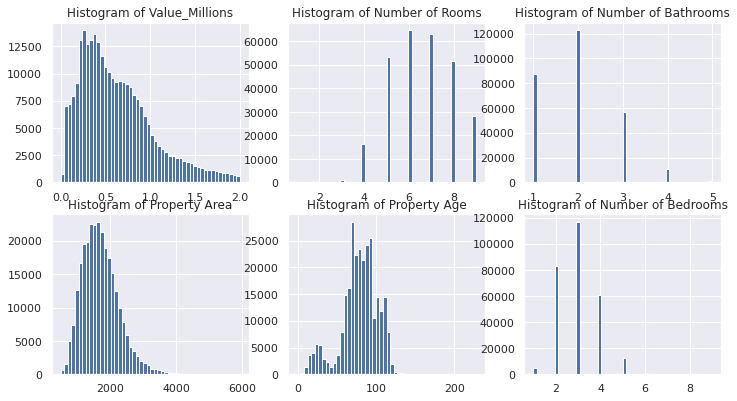

In [ ]:
plt.figure(figsize=(12,10))
vars_to_plot = ['Value_Millions', 'Number of Rooms','Number of Bathrooms','Property Area','Property Age', 'Number of Bedrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1)
    plt.hist(temp_df[var],50)
    title_string = "Histogram of " + var
    plt.title(title_string)

In [ ]:
#distribution of data: home value is skew right, with most homes being less than a million.
# of rooms, bathrooms, bedrooms and property area are normally distributed
##property age: most hoomes between 50& 100 yrs of age

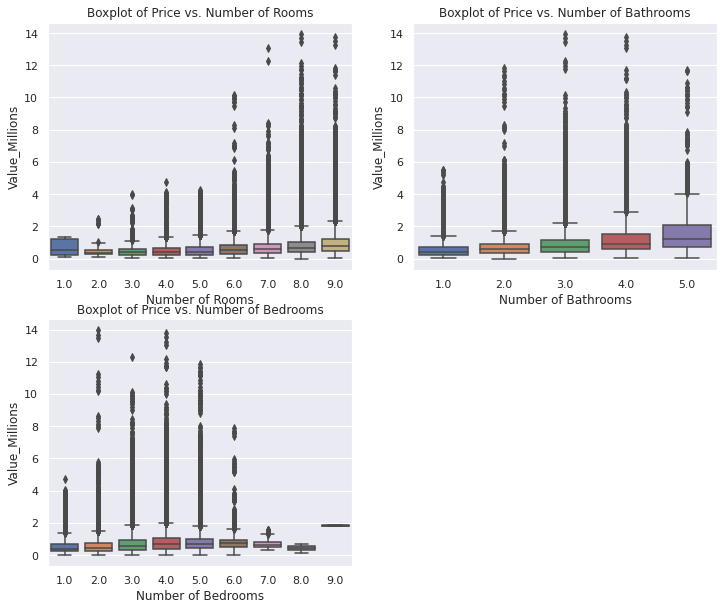

In [ ]:
plt.figure(figsize=(12,10))
vars_to_plot = ['Number of Rooms','Number of Bathrooms', 'Number of Bedrooms']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='Value_Millions', data = df)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Value_Millions")
    plt.title(title_string)


show boxplots via dashboard

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

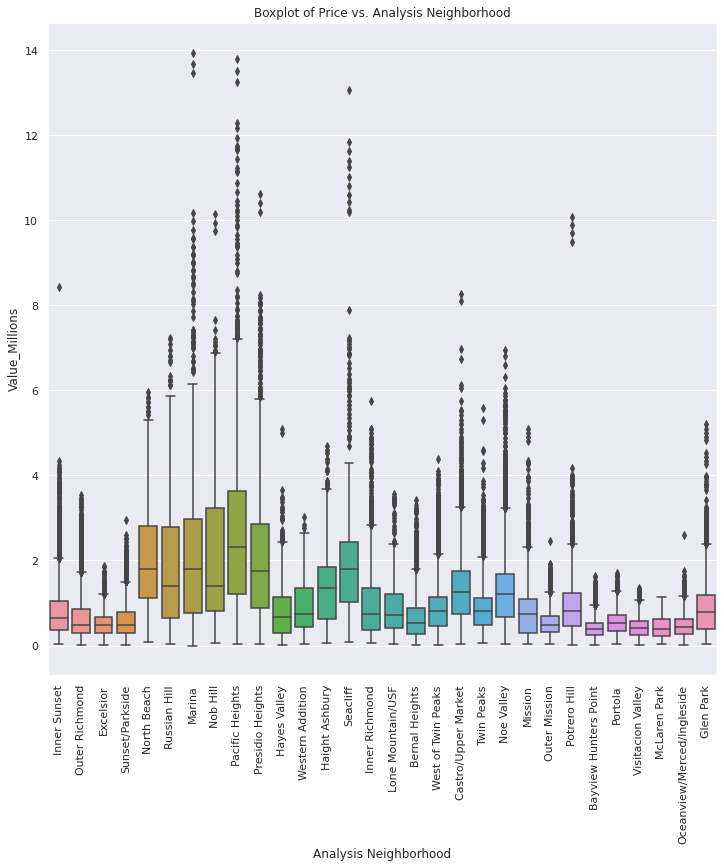

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(x = 'Analysis Neighborhood', y='Value_Millions', data = df)
title_string = "Boxplot of Price vs. " + "Analysis Neighborhood"
plt.ylabel("Value_Millions")
plt.title(title_string)
plt.xticks(rotation=90)

In [ ]:
df.groupby('Analysis Neighborhood')['Property Age'].median().sort_values(ascending = False)

Analysis Neighborhood
Hayes Valley                  116
Western Addition              115
Pacific Heights               111
Mission                       110
Haight Ashbury                109
Castro/Upper Market           105
Inner Richmond                105
North Beach                   105
Noe Valley                    104
Russian Hill                  103
Presidio Heights              102
Potrero Hill                   96
Seacliff                       95
Bernal Heights                 94
Outer Richmond                 92
Glen Park                      91
Nob Hill                       89
Marina                         89
Excelsior                      86
West of Twin Peaks             83
Outer Mission                  83
Inner Sunset                   79
Lone Mountain/USF              77
Oceanview/Merced/Ingleside     75
Sunset/Parkside                74
Visitacion Valley              67
Portola                        66
Twin Peaks                     60
McLaren Park              

In [ ]:
df=df.drop(['Number of Units','Assessed Fixtures Value', 'Assessed Improvement Value',
            'Assessed Improvement Value', 'Assessed Land Value', 'Assessed Personal Property Value',
            'Parcel Number', 'Year Property Built','Number of Stories', 'Current Sales Date'], axis=1)

**Correlation Analysis**

In [ ]:
correlations = df.corr()

In [ ]:
correlations.drop(columns = ['Number of Bathrooms', 'Number of Bedrooms', 'Number of Rooms', 'Basement Area', 'Lot Area',
                  'Assessor Neighborhood District', 'Supervisor District', 'Property Age','Value_Millions', 'Closed Roll Year'])

,Property Area,Total Assessed Value
Closed Roll Year,0.020220,0.173214
Number of Bathrooms,0.653211,0.319052
Number of Bedrooms,0.542275,0.183990
Number of Rooms,0.709767,0.250015
Property Area,1.000000,0.470008
Basement Area,0.211217,-0.026758
Lot Area,0.276599,0.152650
Assessor Neighborhood District,-0.111085,-0.036523
Supervisor District,-0.201474,-0.173073
Total Assessed Value,0.470008,1.000000


In [ ]:
df7=df.drop(["Closed Roll Year", 'Basement Area', "Lot Area", "Total Assessed Value", "Supervisor District", "Assessor Neighborhood District"], axis=1)

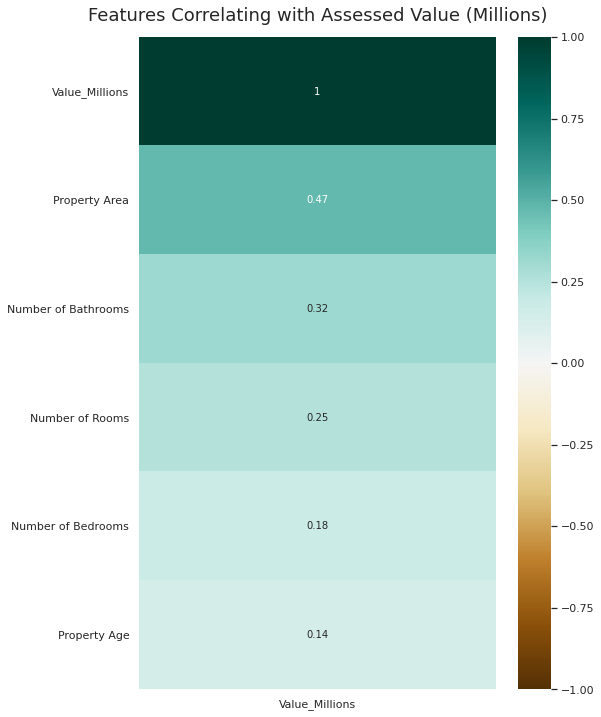

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df7.corr()[['Value_Millions']].sort_values(by='Value_Millions', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Assessed Value (Millions)', fontdict={'fontsize':18}, pad=16);
#property age is only slightly correlated to assessed value. It's almost no correlation.
#unsurprising however is the fact that largest correlations are with measures of size (property area, bathrooms, stories). However I find it interesting that number of
#bathrooms is more correlated to assessed value than number of bedrooms

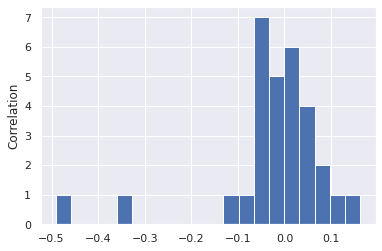

Average correlation:  -0.024298106497908884


In [ ]:
neighbourhoods = df["Analysis Neighborhood"].unique()
cvec = list()
cvec = dict()

for x in neighbourhoods:
    temp = df[df['Analysis Neighborhood'] == x]
    cvec[x] = temp.corr()['Value_Millions']['Property Age']


res = list(cvec.values())
res = [x for x in res if str(x) != 'nan']
res.sort()


plt.hist(res, bins=20)
plt.ylabel('Correlation')
plt.show()


print('Average correlation: ', sum(res)/len(res)) #most of the conditional correlations within analysis neighborhoods are negative even through correlation between assesssment value and
#property age across all of SF is positive. This means clear majority of correlations are at least slightly negative, for an average correlation of -0.05

**Convert String Variables to Ordinal Variables**

In [ ]:
# generate binary values using get_dummies for 'Analysis Neighborhood'
df = pd.get_dummies(df, columns=['Analysis Neighborhood'], prefix = '')


In [ ]:
df.columns = df.columns.str.replace('_', '')

In [ ]:
df.columns

Index(['Closed Roll Year', 'Property Location', 'Number of Bathrooms',
       'Number of Bedrooms', 'Number of Rooms', 'Construction Type',
       'Property Area', 'Basement Area', 'Lot Area',
       'Assessor Neighborhood District', 'Assessor Neighborhood Code',
       'Assessor Neighborhood', 'Supervisor District', 'Total Assessed Value',
       'Property Age', 'geom', 'ValueMillions', 'Bayview Hunters Point',
       'Bernal Heights', 'Castro/Upper Market', 'Excelsior', 'Glen Park',
       'Haight Ashbury', 'Hayes Valley', 'Inner Richmond', 'Inner Sunset',
       'Lone Mountain/USF', 'Marina', 'McLaren Park', 'Mission', 'Nob Hill',
       'Noe Valley', 'North Beach', 'Oceanview/Merced/Ingleside',
       'Outer Mission', 'Outer Richmond', 'Pacific Heights', 'Portola',
       'Potrero Hill', 'Presidio Heights', 'Russian Hill', 'Seacliff',
       'Sunset/Parkside', 'Twin Peaks', 'Visitacion Valley',
       'West of Twin Peaks', 'Western Addition'],
      dtype='object')

**Descriptive Statistics 'Number of Bathrooms'**

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
mod = ols(' Q("Total Assessed Value") ~ Q("Number of Bathrooms") ', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
"Q(""Number of Bathrooms"")",13112207643954406.00000,1.00000,32968.61325,0.00000
Residual,115698523563290048.00000,290906.00000,nan,nan


In [ ]:
pairwise_results = pairwise_ttests(dv='Total Assessed Value', between = ['Number of Bathrooms'], padjust='bonf', data=df)
pairwise_results

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Number of Bathrooms,1.00000,2.00000,False,True,-95.09059,214011.17199,two-sided,0.00000,0.00000,bonf,inf,-0.39522
1,Number of Bathrooms,1.00000,3.00000,False,True,-124.21756,80974.14435,two-sided,0.00000,0.00000,bonf,inf,-0.72885
2,Number of Bathrooms,1.00000,4.00000,False,True,-72.79241,13322.94613,two-sided,0.00000,0.00000,bonf,inf,-1.39709
3,Number of Bathrooms,1.00000,5.00000,False,True,-30.14548,1619.04481,two-sided,0.00000,0.00000,bonf,2.91e+194,-2.86717
4,Number of Bathrooms,2.00000,3.00000,False,True,-70.10524,87655.07963,two-sided,0.00000,0.00000,bonf,inf,-0.39716
5,Number of Bathrooms,2.00000,4.00000,False,True,-55.51066,13442.68920,two-sided,0.00000,0.00000,bonf,inf,-0.96727
6,Number of Bathrooms,2.00000,5.00000,False,True,-25.69944,1620.01892,two-sided,0.00000,0.00000,bonf,1.731e+141,-1.94248
7,Number of Bathrooms,3.00000,4.00000,False,True,-31.11753,15458.62234,two-sided,0.00000,0.00000,bonf,7.674e+206,-0.38804
8,Number of Bathrooms,3.00000,5.00000,False,True,-19.61308,1636.04858,two-sided,0.00000,0.00000,bonf,3.643e+81,-0.96610
9,Number of Bathrooms,4.00000,5.00000,False,True,-10.94794,1835.88189,two-sided,0.00000,0.00000,bonf,2.131e+24,-0.36845


**Descriptive Statistics 'Number of Bedrooms'**

In [ ]:
mod = ols(' Q("Total Assessed Value") ~ Q("Number of Bedrooms") ', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
"Q(""Number of Bedrooms"")",4360519568096070.50000,1.00000,10192.84169,0.00000
Residual,124450211639148400.00000,290906.00000,nan,nan


In [ ]:
pairwise_results = pairwise_ttests(dv='Total Assessed Value', between = ['Number of Bedrooms'], padjust='bonf', data=df)
pairwise_results

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)
/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: overflow encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Number of Bedrooms,1.00000,2.00000,False,True,-6.38039,5662.58026,two-sided,0.00000,0.00000,bonf,1.105e+07,-0.09443
1,Number of Bedrooms,1.00000,3.00000,False,True,-34.45362,5904.36439,two-sided,0.00000,0.00000,bonf,4.012e+254,-0.36687
2,Number of Bedrooms,1.00000,4.00000,False,True,-51.67506,8023.33102,two-sided,0.00000,0.00000,bonf,inf,-0.45357
3,Number of Bedrooms,1.00000,5.00000,False,True,-37.78574,17487.47155,two-sided,0.00000,0.00000,bonf,5.18e+296,-0.46587
4,Number of Bedrooms,1.00000,6.00000,False,True,-12.83115,1058.62565,two-sided,0.00000,0.00000,bonf,5.337e+33,-0.69663
5,Number of Bedrooms,1.00000,7.00000,False,True,-6.55203,97.75227,two-sided,0.00000,0.00000,bonf,1.185e+08,-0.53442
6,Number of Bedrooms,1.00000,8.00000,False,True,3.84197,48.42852,two-sided,0.00036,0.01278,bonf,164.231,0.22545
7,Number of Bedrooms,1.00000,9.00000,False,True,-49.22316,1.12345,two-sided,0.00823,0.29617,bonf,inf,-2.90824
8,Number of Bedrooms,2.00000,3.00000,False,True,-78.92102,205299.34446,two-sided,0.00000,0.00000,bonf,inf,-0.33297
9,Number of Bedrooms,2.00000,4.00000,False,True,-91.10896,94350.21969,two-sided,0.00000,0.00000,bonf,inf,-0.50765


**Descriptive Statistics 'Number of Rooms'**

In [ ]:
mod = ols(' Q("Total Assessed Value") ~ Q("Number of Rooms") ', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
"Q(""Number of Rooms"")",8051621347862611.00000,1.00000,19396.17609,0.00000
Residual,120759109859381888.00000,290906.00000,nan,nan


In [ ]:
pairwise_results = pairwise_ttests(dv='Total Assessed Value', between = ['Number of Rooms'], padjust='bonf', data=df)
pairwise_results

/usr/local/lib/python3.6/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Number of Rooms,1.00000,2.00000,False,True,0.74531,101.26659,two-sided,0.45781,1.00000,bonf,0.267,0.14088
1,Number of Rooms,1.00000,3.00000,False,True,3.08773,48.13535,two-sided,0.00334,0.12035,bonf,13.778,0.49504
2,Number of Rooms,1.00000,4.00000,False,True,2.94720,45.16451,two-sided,0.00506,0.18212,bonf,9.292,0.53673
3,Number of Rooms,1.00000,5.00000,False,True,2.15070,45.05960,two-sided,0.03690,1.00000,bonf,1.381,0.36097
4,Number of Rooms,1.00000,6.00000,False,True,0.32601,45.08012,two-sided,0.74592,1.00000,bonf,0.168,0.04257
5,Number of Rooms,1.00000,7.00000,False,True,-1.19276,45.12011,two-sided,0.23920,1.00000,bonf,0.31,-0.12736
6,Number of Rooms,1.00000,8.00000,False,True,-3.33728,45.25780,two-sided,0.00170,0.06115,bonf,29.55,-0.26472
7,Number of Rooms,1.00000,9.00000,False,True,-5.71073,45.65906,two-sided,0.00000,0.00003,bonf,8.433e+05,-0.37608
8,Number of Rooms,2.00000,3.00000,False,True,1.57902,59.62113,two-sided,0.11962,1.00000,bonf,0.474,0.30165
9,Number of Rooms,2.00000,4.00000,False,True,1.44097,57.13825,two-sided,0.15505,1.00000,bonf,0.382,0.32121


**Descriptive Statistics 'Basement Area'**

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
no_basement=df[df['Basement Area']==0]['Total Assessed Value']
has_basement=df[df['Basement Area']==1]['Total Assessed Value']

statistic, pvalue = stats.ttest_ind(no_basement,has_basement, equal_var=False)
statistic, pvalue

(14.652342473553194, 1.3548737810403913e-48)

**Descriptive Statistics for Supervisor District**

In [ ]:
mod = ols(' Q("Total Assessed Value") ~ Q("Supervisor District") ', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
"Q(""Supervisor District"")",3858419506698406.50000,1.00000,8982.92612,0.00000
Residual,124952311700546224.00000,290906.00000,nan,nan


In [ ]:
#pairwise_results = pairwise_ttests(dv='Total Assessed Value', between = ['Supervisor District'], padjust='bonf', data=df)
#pairwise_results

**Multiple Linear Regression Prediction Model**

In [ ]:
x = df[['Closed Roll Year', 'Number of Bathrooms',
       'Number of Bedrooms', 'Number of Rooms',
       'Property Area', 'Basement Area', 'Lot Area', 'Supervisor District',
       'Property Age', 'Bayview Hunters Point',
       'Bernal Heights', 'Castro/Upper Market', 'Excelsior', 'Glen Park',
       'Haight Ashbury', 'Hayes Valley', 'Inner Richmond', 'Inner Sunset',
       'Lone Mountain/USF', 'Marina', 'McLaren Park', 'Mission', 'Nob Hill',
       'Noe Valley', 'North Beach', 'Oceanview/Merced/Ingleside',
       'Outer Mission', 'Outer Richmond', 'Pacific Heights', 'Portola',
       'Potrero Hill', 'Presidio Heights', 'Russian Hill', 'Seacliff',
       'Sunset/Parkside', 'Twin Peaks', 'Visitacion Valley',
       'West of Twin Peaks', 'Western Addition']]
y = df[['Total Assessed Value']]

In [ ]:
df

,Closed Roll Year,Property Location,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Construction Type,Property Area,Basement Area,Lot Area,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Total Assessed Value,Property Age,geom,ValueMillions,Bayview Hunters Point,Bernal Heights,Castro/Upper Market,Excelsior,Glen Park,Haight Ashbury,Hayes Valley,Inner Richmond,Inner Sunset,Lone Mountain/USF,Marina,McLaren Park,Mission,Nob Hill,Noe Valley,North Beach,Oceanview/Merced/Ingleside,Outer Mission,Outer Richmond,Pacific Heights,Portola,Potrero Hill,Presidio Heights,Russian Hill,Seacliff,Sunset/Parkside,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition
0,2012,1516 11TH AV,2.00000,3.00000,6.00000,D,1550,1.00000,1437.00000,2.00000,2F,Inner Sunset,7.00000,905336.00000,87,"37.75987755666,-122.46794778293902",0.90534,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2012,1974 19TH AV,2.00000,4.00000,8.00000,D,2015,1.00000,2247.00000,2.00000,2G,Inner Parkside,7.00000,409454.00000,85,"37.75101505764,-122.47586972746102",0.40945,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2012,0583 19TH AV,1.00000,3.00000,9.00000,D,1870,0.00000,2060.00000,1.00000,1A,Central Richmond,1.00000,881749.00000,98,"37.776928912607,-122.47831758208301",0.88175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2012,0856 BRUNSWICK ST,3.00000,3.00000,8.00000,D,1839,1.00000,2625.00000,10.00000,10B,Croker Amazon,11.00000,615142.00000,61,"37.7081642176,-122.45106830985301",0.61514,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2012,1466 07TH AV,1.00000,3.00000,6.00000,D,1850,0.00000,3000.00000,2.00000,2F,Inner Sunset,5.00000,429675.00000,90,"37.76104354177,-122.463627312755",0.42967,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290903,2019,0008 HEARST AV,1.00000,2.00000,6.00000,D,1225,1.00000,2812.50000,4.00000,4S,Sunnyside,7.00000,386054.00000,80,"37.730982518632,-122.43872748625101",0.38605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
290904,2019,0088 COUNTRY CLUB DR,3.00000,3.00000,7.00000,D,2040,1.00000,3977.00000,3.00000,3A,Lake Shore,7.00000,821616.00000,65,"37.729669446453,-122.496393232848",0.82162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
290905,2019,3018 25TH AV,3.00000,3.00000,7.00000,D,2545,1.00000,3332.00000,3.00000,3F,Merced Manor,7.00000,1226932.00000,24,"37.732220901673,-122.480707587412",1.22693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
290906,2019,0423 RALSTON ST,2.00000,3.00000,6.00000,D,1535,1.00000,2495.00000,3.00000,3B,Merced Heights,11.00000,321910.00000,73,"37.720116938309,-122.469234215927",0.32191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
year = 2019
bathrooms = 1
bedrooms = 3
rooms = 6
property_area = 1850
basement = 0
lot_area = 3000
supervisor = 5
age = 90
print ('Predicted House Price: \n', regr.predict([[year, bathrooms, bedrooms, rooms, property_area, basement, lot_area, supervisor, age,
                                                   0,0,0,0,0,0,0,0,1,0,
                                                   0,0,0,0,0,0,0,0,0,0,
                                                   0,0,0,0,0,0,0,0,0,0]]))

Intercept: 
 [-66691359.07721782]
Coefficients: 
 [[ 3.33112181e+04  8.22652549e+04  1.08552664e+04 -4.66798720e+04
   3.53962580e+02 -4.92480455e+04  1.68769039e+01 -7.18918314e+03
   1.20031256e+03 -4.79894174e+05 -2.32634442e+05  2.41792039e+05
  -4.09421782e+05 -1.28045247e+05  1.87721829e+05 -1.98817579e+05
  -2.44493685e+05 -2.90591921e+05 -2.90618483e+05  7.26191266e+05
  -4.78881088e+05 -1.62816847e+05  7.90886741e+05  1.95404736e+05
   8.11962262e+05 -4.07077084e+05 -3.92998016e+05 -4.16962702e+05
   1.21108612e+06 -4.26559223e+05 -6.66091598e+04  6.64985030e+05
   6.74194712e+05  5.06581220e+05 -4.05486156e+05 -1.09758773e+05
  -4.57601936e+05 -2.31036693e+05 -1.80500965e+05]]
Predicted House Price: 
 [[885693.84325967]]


In [ ]:
# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

                             OLS Regression Results                             
Dep. Variable:     Total Assessed Value   R-squared:                       0.442
Model:                              OLS   Adj. R-squared:                  0.442
Method:                   Least Squares   F-statistic:                     6067.
Date:                  Sat, 13 Feb 2021   Prob (F-statistic):               0.00
Time:                          18:37:39   Log-Likelihood:            -4.2284e+06
No. Observations:                290908   AIC:                         8.457e+06
Df Residuals:                    290869   BIC:                         8.457e+06
Df Model:                            38                                         
Covariance Type:              nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------


**Random Forest**

In [ ]:
df_forest = df[df['Closed Roll Year'] == 2019]

In [ ]:
x = df_forest[['Number of Bathrooms',
       'Number of Bedrooms', 'Number of Rooms',
       'Property Area', 'Basement Area', 'Lot Area', 'Supervisor District',
       'Property Age', 'Bayview Hunters Point',
       'Bernal Heights', 'Castro/Upper Market', 'Excelsior', 'Glen Park',
       'Haight Ashbury', 'Hayes Valley', 'Inner Richmond', 'Inner Sunset',
       'Lone Mountain/USF', 'Marina', 'McLaren Park', 'Mission', 'Nob Hill',
       'Noe Valley', 'North Beach', 'Oceanview/Merced/Ingleside',
       'Outer Mission', 'Outer Richmond', 'Pacific Heights', 'Portola',
       'Potrero Hill', 'Presidio Heights', 'Russian Hill', 'Seacliff',
       'Sunset/Parkside', 'Twin Peaks', 'Visitacion Valley',
       'West of Twin Peaks', 'Western Addition']]
y = df_forest[['Total Assessed Value']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=15)

In [ ]:
clf = RandomForestClassifier(n_estimators=25, max_depth = 10)
del x
del y

In [ ]:
clf.fit(x_train,y_train)
del x_train
del y_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.001487652484379649


In [ ]:
prediction = clf.predict([[bathrooms, bedrooms, rooms, property_area, basement, lot_area, supervisor, age,
                                                   0,0,0,0,0,0,0,0,1,0,
                                                   0,0,0,0,0,0,0,0,0,0,
                                                   0,0,0,0,0,0,0,0,0,0]])
print ('Predicted Result: ', prediction)

Predicted Result:  [1200000.]


In [ ]:
df

,Closed Roll Year,Property Location,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Construction Type,Property Area,Basement Area,Lot Area,Assessor Neighborhood District,Assessor Neighborhood Code,Assessor Neighborhood,Supervisor District,Total Assessed Value,Property Age,geom,ValueMillions,Bayview Hunters Point,Bernal Heights,Castro/Upper Market,Excelsior,Glen Park,Haight Ashbury,Hayes Valley,Inner Richmond,Inner Sunset,Lone Mountain/USF,Marina,McLaren Park,Mission,Nob Hill,Noe Valley,North Beach,Oceanview/Merced/Ingleside,Outer Mission,Outer Richmond,Pacific Heights,Portola,Potrero Hill,Presidio Heights,Russian Hill,Seacliff,Sunset/Parkside,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition
0,2012,1516 11TH AV,2.00000,3.00000,6.00000,D,1550,1.00000,1437.00000,2.00000,2F,Inner Sunset,7.00000,905336.00000,87,"37.75987755666,-122.46794778293902",0.90534,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2012,1974 19TH AV,2.00000,4.00000,8.00000,D,2015,1.00000,2247.00000,2.00000,2G,Inner Parkside,7.00000,409454.00000,85,"37.75101505764,-122.47586972746102",0.40945,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2012,0583 19TH AV,1.00000,3.00000,9.00000,D,1870,0.00000,2060.00000,1.00000,1A,Central Richmond,1.00000,881749.00000,98,"37.776928912607,-122.47831758208301",0.88175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2012,0856 BRUNSWICK ST,3.00000,3.00000,8.00000,D,1839,1.00000,2625.00000,10.00000,10B,Croker Amazon,11.00000,615142.00000,61,"37.7081642176,-122.45106830985301",0.61514,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2012,1466 07TH AV,1.00000,3.00000,6.00000,D,1850,0.00000,3000.00000,2.00000,2F,Inner Sunset,5.00000,429675.00000,90,"37.76104354177,-122.463627312755",0.42967,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290903,2019,0008 HEARST AV,1.00000,2.00000,6.00000,D,1225,1.00000,2812.50000,4.00000,4S,Sunnyside,7.00000,386054.00000,80,"37.730982518632,-122.43872748625101",0.38605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
290904,2019,0088 COUNTRY CLUB DR,3.00000,3.00000,7.00000,D,2040,1.00000,3977.00000,3.00000,3A,Lake Shore,7.00000,821616.00000,65,"37.729669446453,-122.496393232848",0.82162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
290905,2019,3018 25TH AV,3.00000,3.00000,7.00000,D,2545,1.00000,3332.00000,3.00000,3F,Merced Manor,7.00000,1226932.00000,24,"37.732220901673,-122.480707587412",1.22693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
290906,2019,0423 RALSTON ST,2.00000,3.00000,6.00000,D,1535,1.00000,2495.00000,3.00000,3B,Merced Heights,11.00000,321910.00000,73,"37.720116938309,-122.469234215927",0.32191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
